In [2]:
import os

def delete_txt_files(directory):
    """
    Delete all .txt files in the specified directory.

    Parameters:
    directory (str): The path to the directory where .txt files should be deleted.
    """
    # Loop through all the files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            
            try:
                # Remove the file
                os.remove(file_path)
                print(f"Deleted {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Example usage:
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, 'big_data')
delete_txt_files(data_directory)


In [3]:
import pandas as pd

df_user = pd.read_csv('big_data/metadata_participants.csv', sep=',')

print(df_user.head())
print(df_user.columns)


   PARTICIPANT_ID  AGE  GENDER  HAS_TAKEN_TYPING_COURSE COUNTRY  LAYOUT  \
0               3   30    none                        0      US  qwerty   
1               5   27  female                        0      MY  qwerty   
2               7   13  female                        0      AU  qwerty   
3              23   21  female                        0      IN  qwerty   
4              24   21  female                        0      PH  qwerty   

  NATIVE_LANGUAGE FINGERS  TIME_SPENT_TYPING KEYBOARD_TYPE  ERROR_RATE  \
0              en     1-2                  8          full    0.511945   
1              en     7-8                  6        laptop    0.871080   
2              en     7-8                  0        laptop    6.685633   
3              en     3-4                  0          full    2.130493   
4              tl     7-8                  1        laptop    1.893287   

   AVG_WPM_15     AVG_IKI      ECPC      KSPC     ROR  
0     61.9483  169.224722  0.052901  1.151877  0

C:\Users\laras\AppData\Local\Temp\ipykernel_15676\3855396166.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


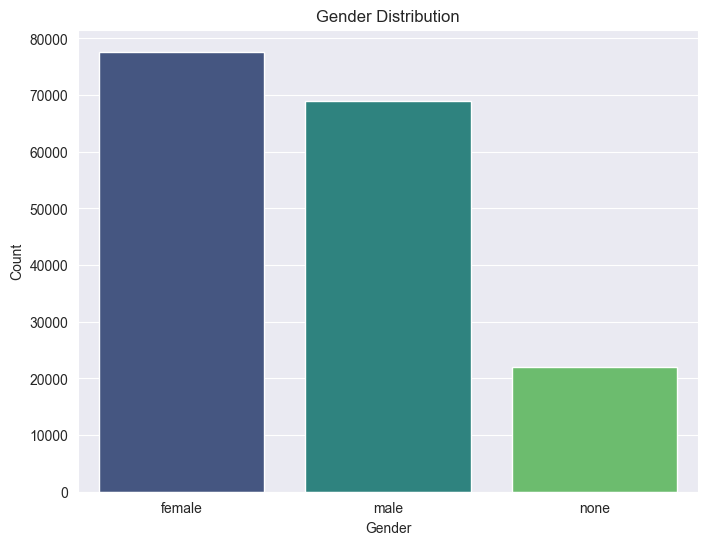

Gender Percentages:
GENDER
female    46.066883
male      40.884610
none      13.048507
Name: count, dtype: float64


C:\Users\laras\AppData\Local\Temp\ipykernel_15676\3855396166.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


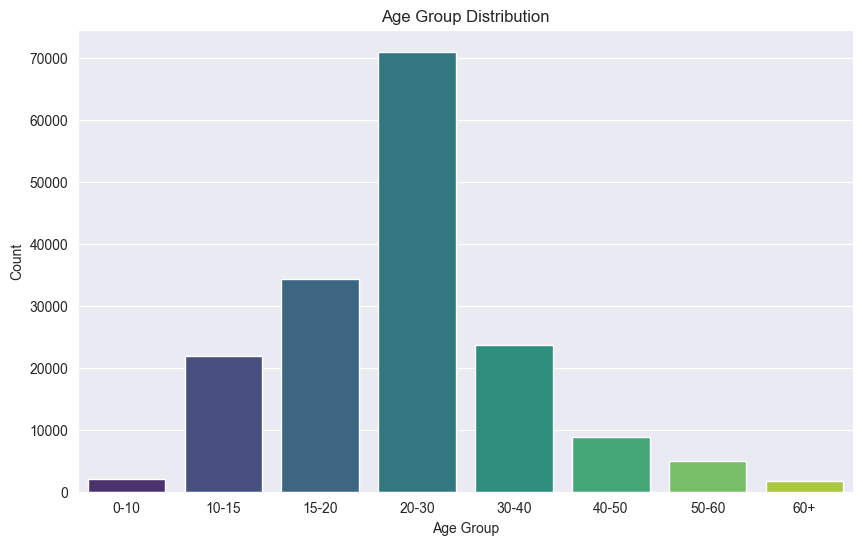

Age Group Percentages:
AGE_GROUP
0-10      1.242037
10-15    12.977330
15-20    20.341768
20-30    42.091059
30-40    14.059219
40-50     5.281920
50-60     2.906984
60+       0.981648
Name: count, dtype: float64


C:\Users\laras\AppData\Local\Temp\ipykernel_15676\3855396166.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


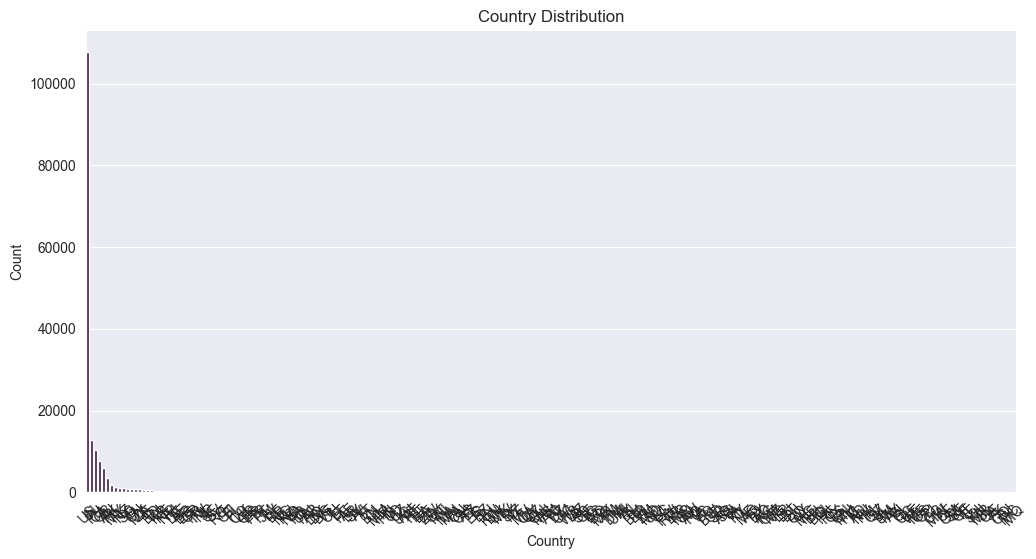

C:\Users\laras\AppData\Local\Temp\ipykernel_15676\3855396166.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')


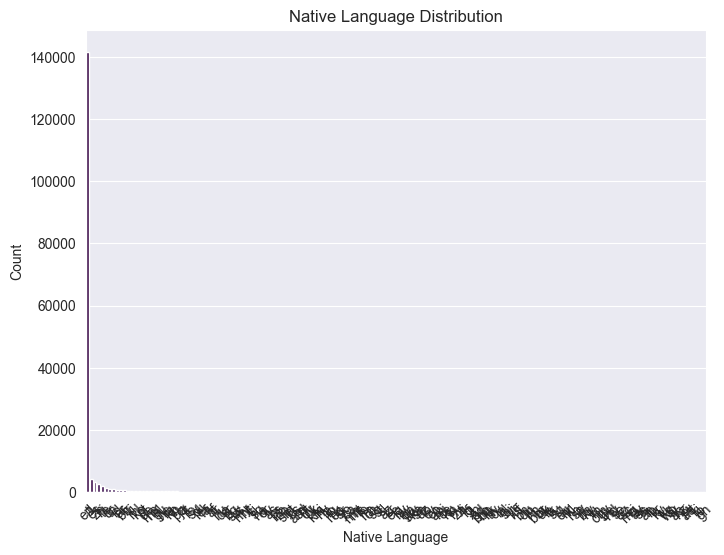

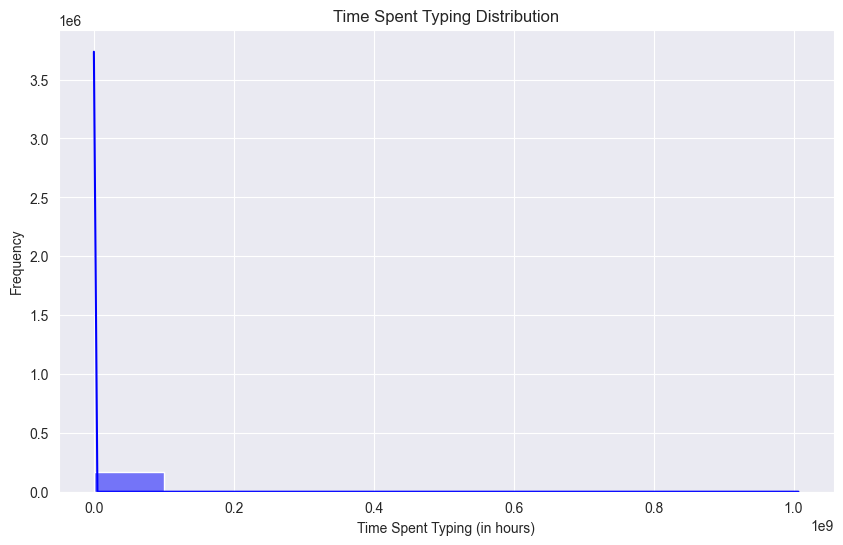

C:\Users\laras\AppData\Local\Temp\ipykernel_15676\3855396166.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')


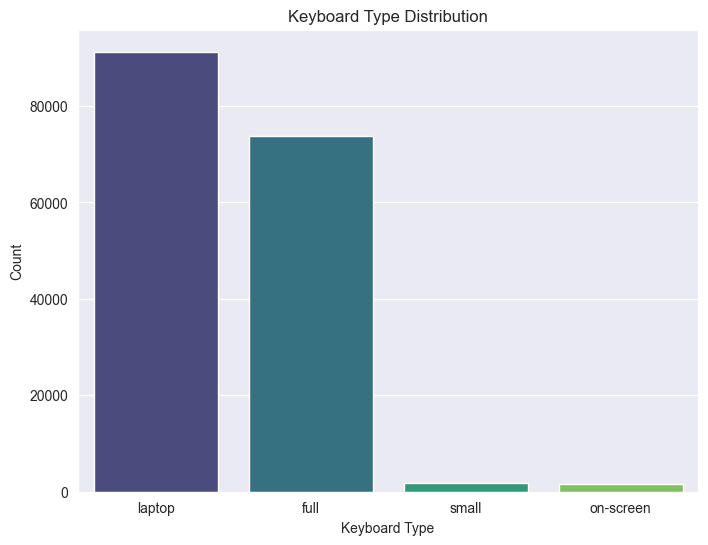

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Plotting Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df_user['GENDER'].value_counts()
gender_percentages = gender_counts / len(df_user) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print gender percentages
print("Gender Percentages:")
print(gender_percentages)

# 2. Plotting Age Distribution
bins = [0, 10, 15, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_user['AGE_GROUP'] = pd.cut(df_user['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_group_counts = df_user['AGE_GROUP'].value_counts().sort_index()
age_group_percentages = age_group_counts / len(df_user) * 100
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print age group percentages
print("Age Group Percentages:")
print(age_group_percentages)

# 3. Plotting Country Distribution
plt.figure(figsize=(12, 6))
country_counts = df_user['COUNTRY'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Plotting Native Language Distribution
plt.figure(figsize=(8, 6))
native_language_counts = df_user['NATIVE_LANGUAGE'].value_counts()
sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')
plt.title("Native Language Distribution")
plt.xlabel("Native Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Plotting Time Spent Typing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_user['TIME_SPENT_TYPING'], bins=10, kde=True, color='blue')
plt.title("Time Spent Typing Distribution")
plt.xlabel("Time Spent Typing (in hours)")
plt.ylabel("Frequency")
plt.show()

# 6. Plotting Keyboard Type Distribution
plt.figure(figsize=(8, 6))
keyboard_type_counts = df_user['KEYBOARD_TYPE'].value_counts()
sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')
plt.title("Keyboard Type Distribution")
plt.xlabel("Keyboard Type")
plt.ylabel("Count")
plt.show()


In [5]:
import os
import pandas as pd

# Define the directory containing the .csv files
data_directory = os.path.join(os.getcwd(), 'big_data')

# Initialize an empty list to hold individual DataFrames
dataframes = []

# Define the files to exclude
exclude_files = ['metadata_participants.csv']

# Loop through all the files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv') and filename not in exclude_files:
        csv_file_path = os.path.join(data_directory, filename)
        
        # Read each CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file_path)
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_experiment = pd.concat(dataframes, ignore_index=True)

# Optionally, print the combined DataFrame or save it to a new CSV file
print(df_experiment)
# combined_dataframe.to_csv(os.path.join(data_directory, 'combined_data.csv'), index=False)


       PARTICIPANT_ID  TEST_SECTION_ID  \
0              100031          1091423   
1              100031          1091423   
2              100031          1091423   
3              100031          1091423   
4              100031          1091423   
...               ...              ...   
95904          100439          1096062   
95905          100439          1096062   
95906          100439          1096062   
95907          100439          1096062   
95908          100439          1096062   

                                                SENTENCE  \
0                 Robert ,I'm working on this right now.   
1                 Robert ,I'm working on this right now.   
2                 Robert ,I'm working on this right now.   
3                 Robert ,I'm working on this right now.   
4                 Robert ,I'm working on this right now.   
...                                                  ...   
95904  Expect him to produce good numbers against New...   
95905  Expect h

In [6]:
import pandas as pd

# Merge the two DataFrames on PARTICIPANT_ID
df_combined = pd.merge(df_user, df_experiment, on='PARTICIPANT_ID', how='inner')

# Optionally, print the first few rows of the combined DataFrame
print(df_combined.head())

# You can also save the combined DataFrame to a CSV file if needed
# df_combined.to_csv('combined_data.csv', index=False)


   PARTICIPANT_ID  AGE  GENDER  HAS_TAKEN_TYPING_COURSE COUNTRY  LAYOUT  \
0            1002   31  female                        0      PH  qwerty   
1            1002   31  female                        0      PH  qwerty   
2            1002   31  female                        0      PH  qwerty   
3            1002   31  female                        0      PH  qwerty   
4            1002   31  female                        0      PH  qwerty   

  NATIVE_LANGUAGE FINGERS  TIME_SPENT_TYPING KEYBOARD_TYPE  ...     ROR  \
0              en    9-10                  2        laptop  ...  0.4892   
1              en    9-10                  2        laptop  ...  0.4892   
2              en    9-10                  2        laptop  ...  0.4892   
3              en    9-10                  2        laptop  ...  0.4892   
4              en    9-10                  2        laptop  ...  0.4892   

   AGE_GROUP  TEST_SECTION_ID                                 SENTENCE  \
0      30-40            

In [7]:
# Check for any NaN values in the resulting DataFrame
nan_values = df_combined.isna().sum()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


Columns with NaN values:
LETTER    8391
dtype: int64


C:\Users\laras\AppData\Local\Temp\ipykernel_15676\424407407.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


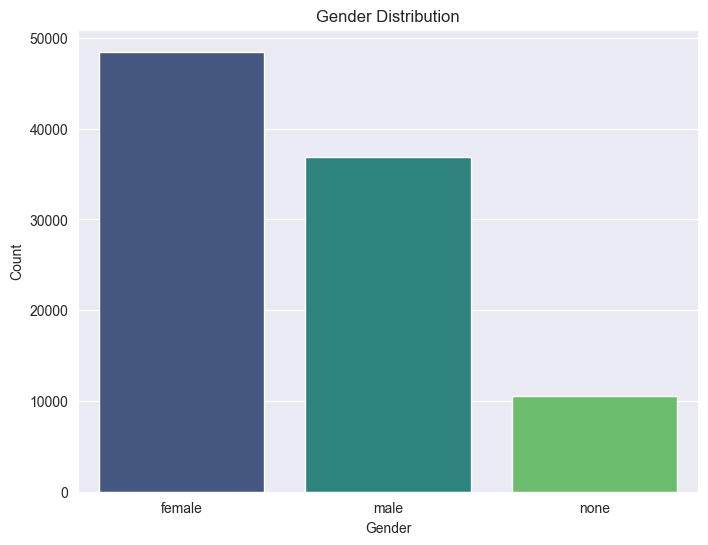

Gender Percentages:
GENDER
female    50.541659
male      38.452074
none      11.006266
Name: count, dtype: float64


C:\Users\laras\AppData\Local\Temp\ipykernel_15676\424407407.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


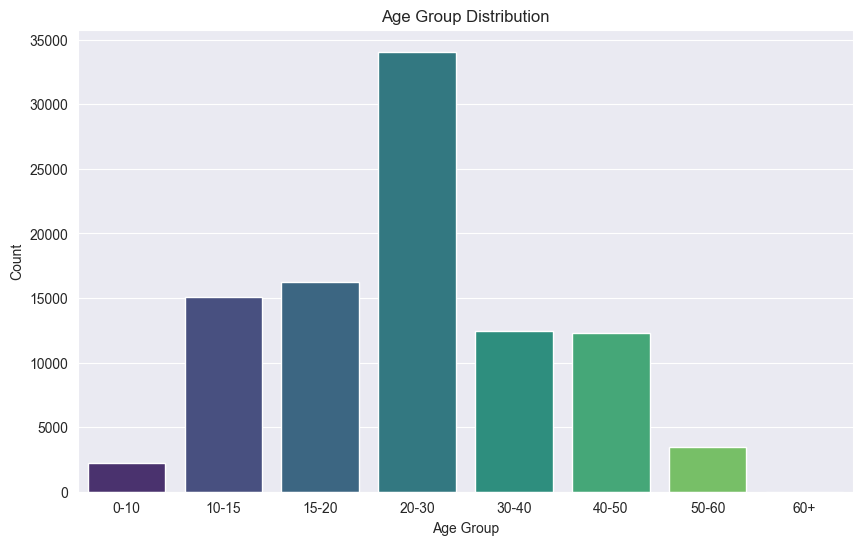

Age Group Percentages:
AGE_GROUP
0-10      2.344931
10-15    15.700299
15-20    16.962954
20-30    35.518043
30-40    12.989396
40-50    12.845510
50-60     3.638866
60+       0.000000
Name: count, dtype: float64


C:\Users\laras\AppData\Local\Temp\ipykernel_15676\424407407.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


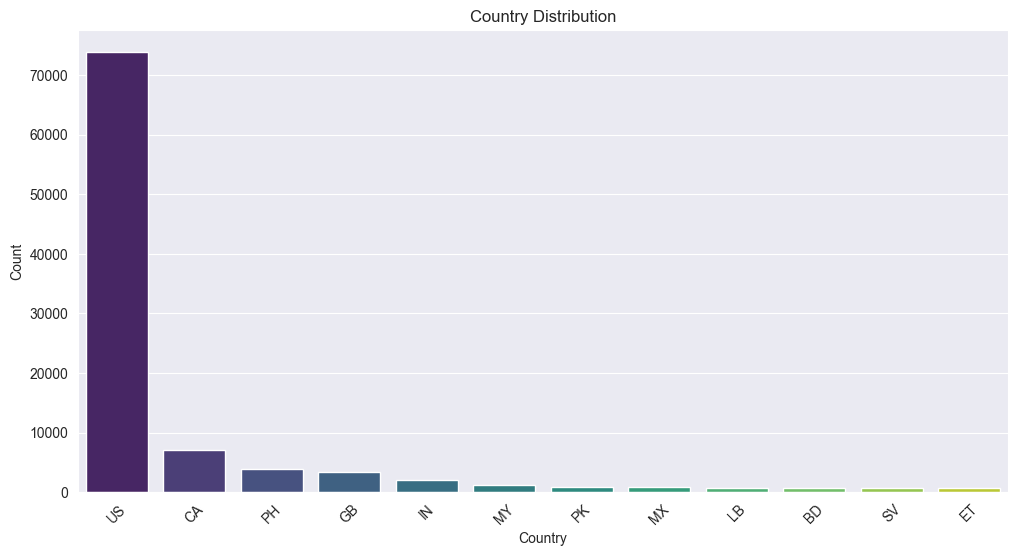

C:\Users\laras\AppData\Local\Temp\ipykernel_15676\424407407.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')


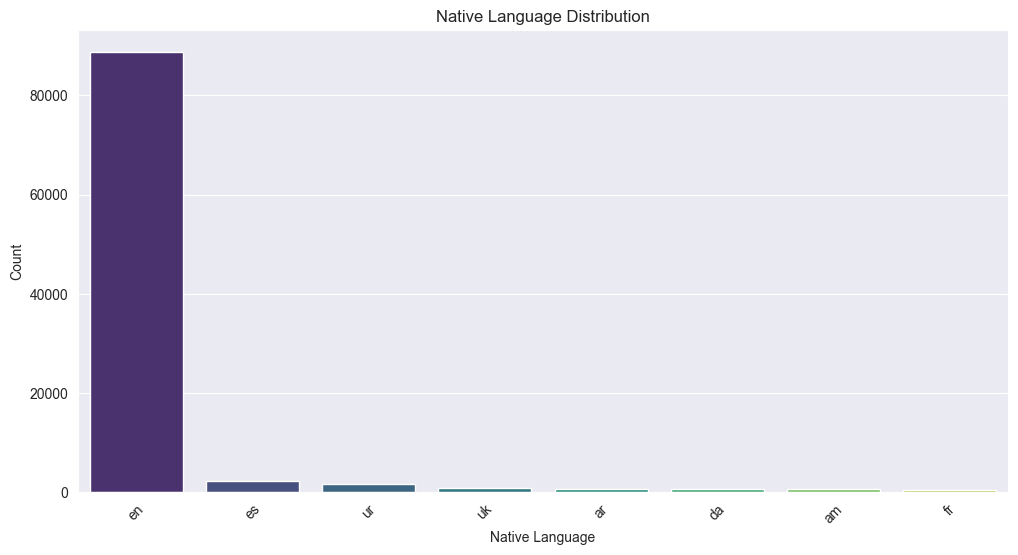

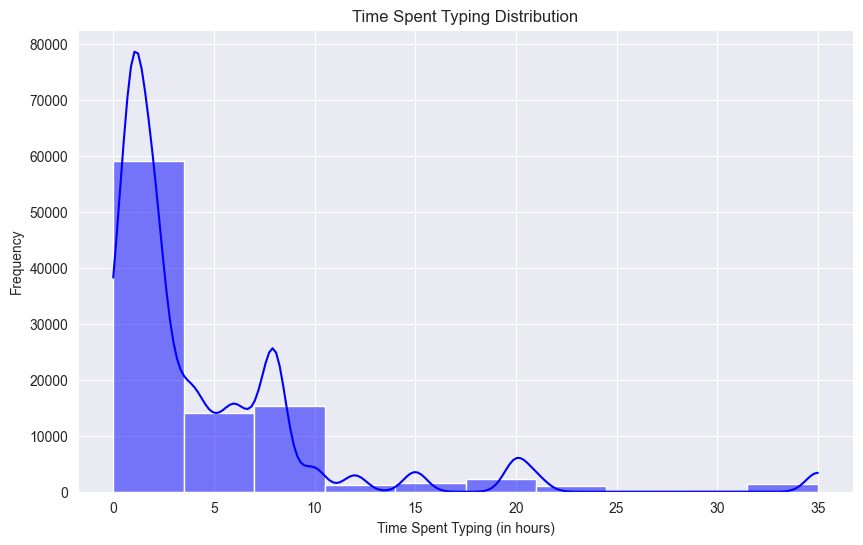

C:\Users\laras\AppData\Local\Temp\ipykernel_15676\424407407.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')


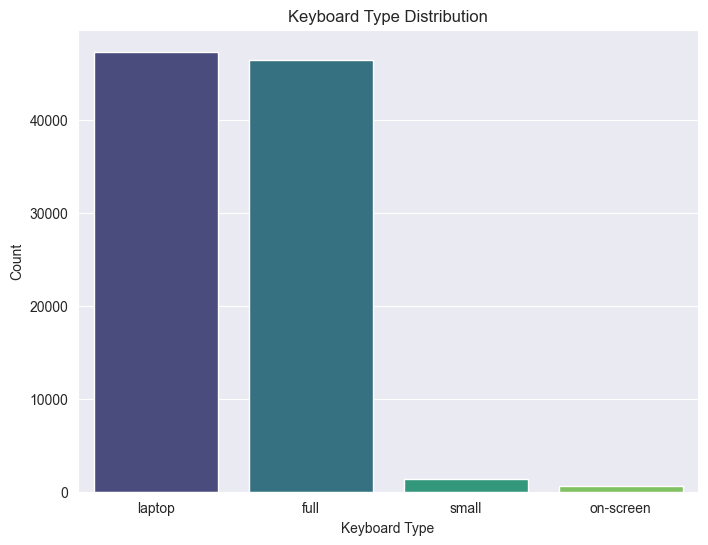

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is your combined DataFrame after merging

# 1. Plotting Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df_combined['GENDER'].value_counts()
gender_percentages = gender_counts / len(df_combined) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print gender percentages
print("Gender Percentages:")
print(gender_percentages)

# 2. Plotting Age Distribution
bins = [0, 10, 15, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_combined['AGE_GROUP'] = pd.cut(df_combined['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_group_counts = df_combined['AGE_GROUP'].value_counts().sort_index()
age_group_percentages = age_group_counts / len(df_combined) * 100
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print age group percentages
print("Age Group Percentages:")
print(age_group_percentages)

# 3. Plotting Country Distribution
plt.figure(figsize=(12, 6))
country_counts = df_combined['COUNTRY'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Plotting Native Language Distribution
plt.figure(figsize=(12, 6))
native_language_counts = df_combined['NATIVE_LANGUAGE'].value_counts()
sns.barplot(x=native_language_counts.index, y=native_language_counts.values, palette='viridis')
plt.title("Native Language Distribution")
plt.xlabel("Native Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Plotting Time Spent Typing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['TIME_SPENT_TYPING'], bins=10, kde=True, color='blue')
plt.title("Time Spent Typing Distribution")
plt.xlabel("Time Spent Typing (in hours)")
plt.ylabel("Frequency")
plt.show()

# 6. Plotting Keyboard Type Distribution
plt.figure(figsize=(8, 6))
keyboard_type_counts = df_combined['KEYBOARD_TYPE'].value_counts()
sns.barplot(x=keyboard_type_counts.index, y=keyboard_type_counts.values, palette='viridis')
plt.title("Keyboard Type Distribution")
plt.xlabel("Keyboard Type")
plt.ylabel("Count")
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df_combined is your DataFrame
# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE)
# and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Create a pipeline that combines the preprocessor with the KNN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      9730
        male       1.00      1.00      1.00      7311
        none       1.00      1.00      1.00      2141

    accuracy                           1.00     19182
   macro avg       1.00      1.00      1.00     19182
weighted avg       1.00      1.00      1.00     19182



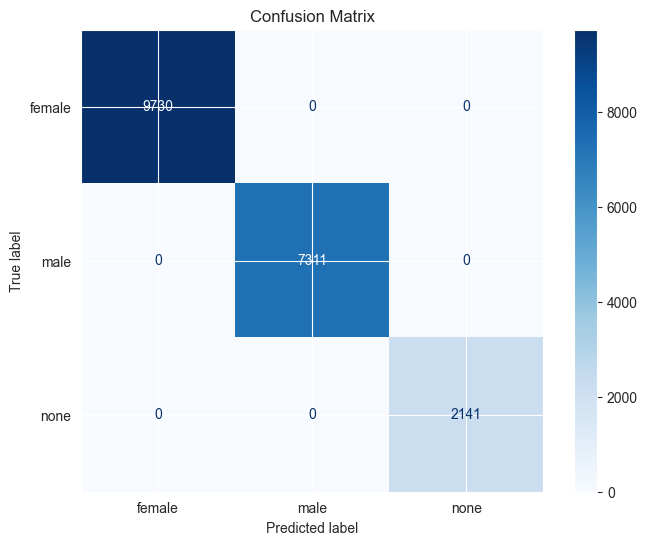

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    labels: list of strings
        The list of labels for the classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    
    plt.title("Confusion Matrix")
    plt.show()

# Example usage after training the model
# Assuming y_test and y_pred are already defined
plot_confusion_matrix(y_test, y_pred, labels=knn_pipeline.classes_)


C:\Users\laras\Coding\EmotionRecognitionKeystrokeDynamics\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8774 - loss: 0.2745 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 2/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 3.1177e-04
Epoch 3/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.1668e-04 - val_accuracy: 1.0000 - val_loss: 5.8820e-05
Epoch 4/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 4.2435e-05 - val_accuracy: 1.0000 - val_loss: 1.3108e-05
Epoch 5/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 9.6292e-06 - val_accuracy: 1.0000 - val_loss: 3.1809e-06
Epoch 6/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.3706e-06 - val_accuracy: 1.0000 - val_loss: 7.9059e-07
Epoch 7/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 5.8264e-07 - val_accuracy: 1.0000 - val_loss: 2.0262e-07
Epoch 8/20
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 7s 3

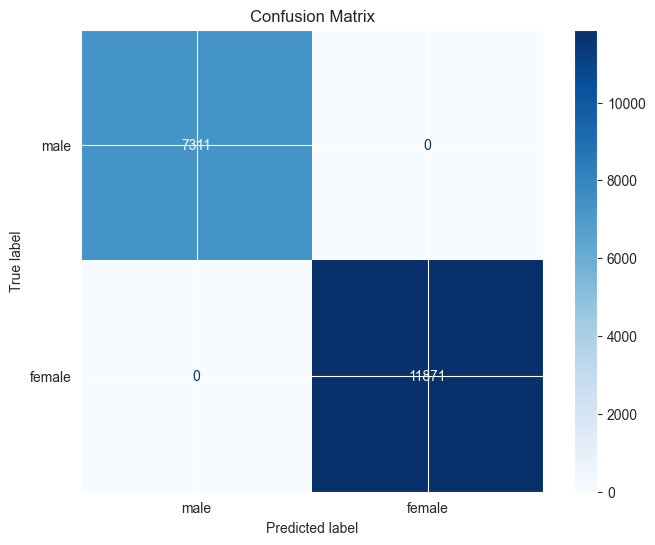

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assume df_combined is your combined DataFrame after merging

# Select the features and target
features = ['FINGERS', 'TIME_SPENT_TYPING', 'KEYBOARD_TYPE', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']
target = 'GENDER'

X = df_combined[features]
y = df_combined[target]

# One-hot encode categorical variables (FINGERS, KEYBOARD_TYPE)
# and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']),
        ('cat', OneHotEncoder(), ['FINGERS', 'KEYBOARD_TYPE'])
    ])

# Apply preprocessing to the features
X = preprocessor.fit_transform(X)

# Encode target variable if it's categorical (e.g., 'male', 'female')
y = np.where(y == 'male', 0, 1)  # Assuming binary gender classification (0: male, 1: female)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    labels: list of strings
        The list of labels for the classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['male', 'female'])
